In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # визуализация данных
import numpy as np
%matplotlib inline

In [112]:
import os
lst = os.listdir('./data')

lst_data = []
for file in lst:
    lst_data.append(pd.read_csv('./data/' + file))

In [113]:
all_data = pd.concat(lst_data, ignore_index=True)
all_data['section_rel'] = all_data['section_count_after'] / all_data['section_count_before']
if 'Unnamed: 0' in all_data:
    all_data = all_data.drop(['Unnamed: 0'], axis=1)

In [114]:
tired_state = len(all_data[all_data.condition == 0]) 
awake_state = len(all_data[all_data.condition == 1]) 
n_samples = tired_state if tired_state < awake_state else awake_state
print(n_samples)
print(tired_state)
print(awake_state)

717
717
1422


In [115]:
from sklearn.utils import resample
sampled_0 = resample(all_data[all_data.iloc[:, -2] == 0], replace = False, n_samples = n_samples, random_state=39)
sampled_1 = resample(all_data[all_data.iloc[:, -2] == 1], replace = False, n_samples = n_samples, random_state=39)

all_data = pd.concat([sampled_0, sampled_1])

In [116]:
len(all_data[all_data.condition == 0])

717

In [117]:
len(all_data[all_data.condition == 1])

717

In [118]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 1908 to 404
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   section_count_before   1434 non-null   int64  
 1   section_count_after    1434 non-null   int64  
 2   angle_max              1434 non-null   float64
 3   section_max1_value     1434 non-null   float64
 4   section_max2_value     1434 non-null   float64
 5   section_max3_value     1434 non-null   float64
 6   section_max4_value     1434 non-null   float64
 7   section_max5_value     1434 non-null   float64
 8   section_average_value  1434 non-null   float64
 9   section_median_value   1434 non-null   float64
 10  square                 1434 non-null   float64
 11  time                   1434 non-null   float64
 12  time_median            1434 non-null   float64
 13  time_average           1434 non-null   float64
 14  condition              1434 non-null   int64  
 15  se

In [119]:
Dup_Rows = all_data[all_data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   section_count_before   0 non-null      int64  
 1   section_count_after    0 non-null      int64  
 2   angle_max              0 non-null      float64
 3   section_max1_value     0 non-null      float64
 4   section_max2_value     0 non-null      float64
 5   section_max3_value     0 non-null      float64
 6   section_max4_value     0 non-null      float64
 7   section_max5_value     0 non-null      float64
 8   section_average_value  0 non-null      float64
 9   section_median_value   0 non-null      float64
 10  square                 0 non-null      float64
 11  time                   0 non-null      float64
 12  time_median            0 non-null      float64
 13  time_average           0 non-null      float64
 14  condition              0 non-null      int64  
 15  section_rel       

In [120]:
all_data.drop_duplicates(keep='first', inplace = True)

In [121]:
def print_hist_boxplot_heatmap(data):
    data.hist(figsize = (25, 25), grid = True)
    plt.show()
    for el in data:
        sns.boxplot(x=data[el])
        plt.show()
    plt.figure(figsize=(10, 6))
    sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

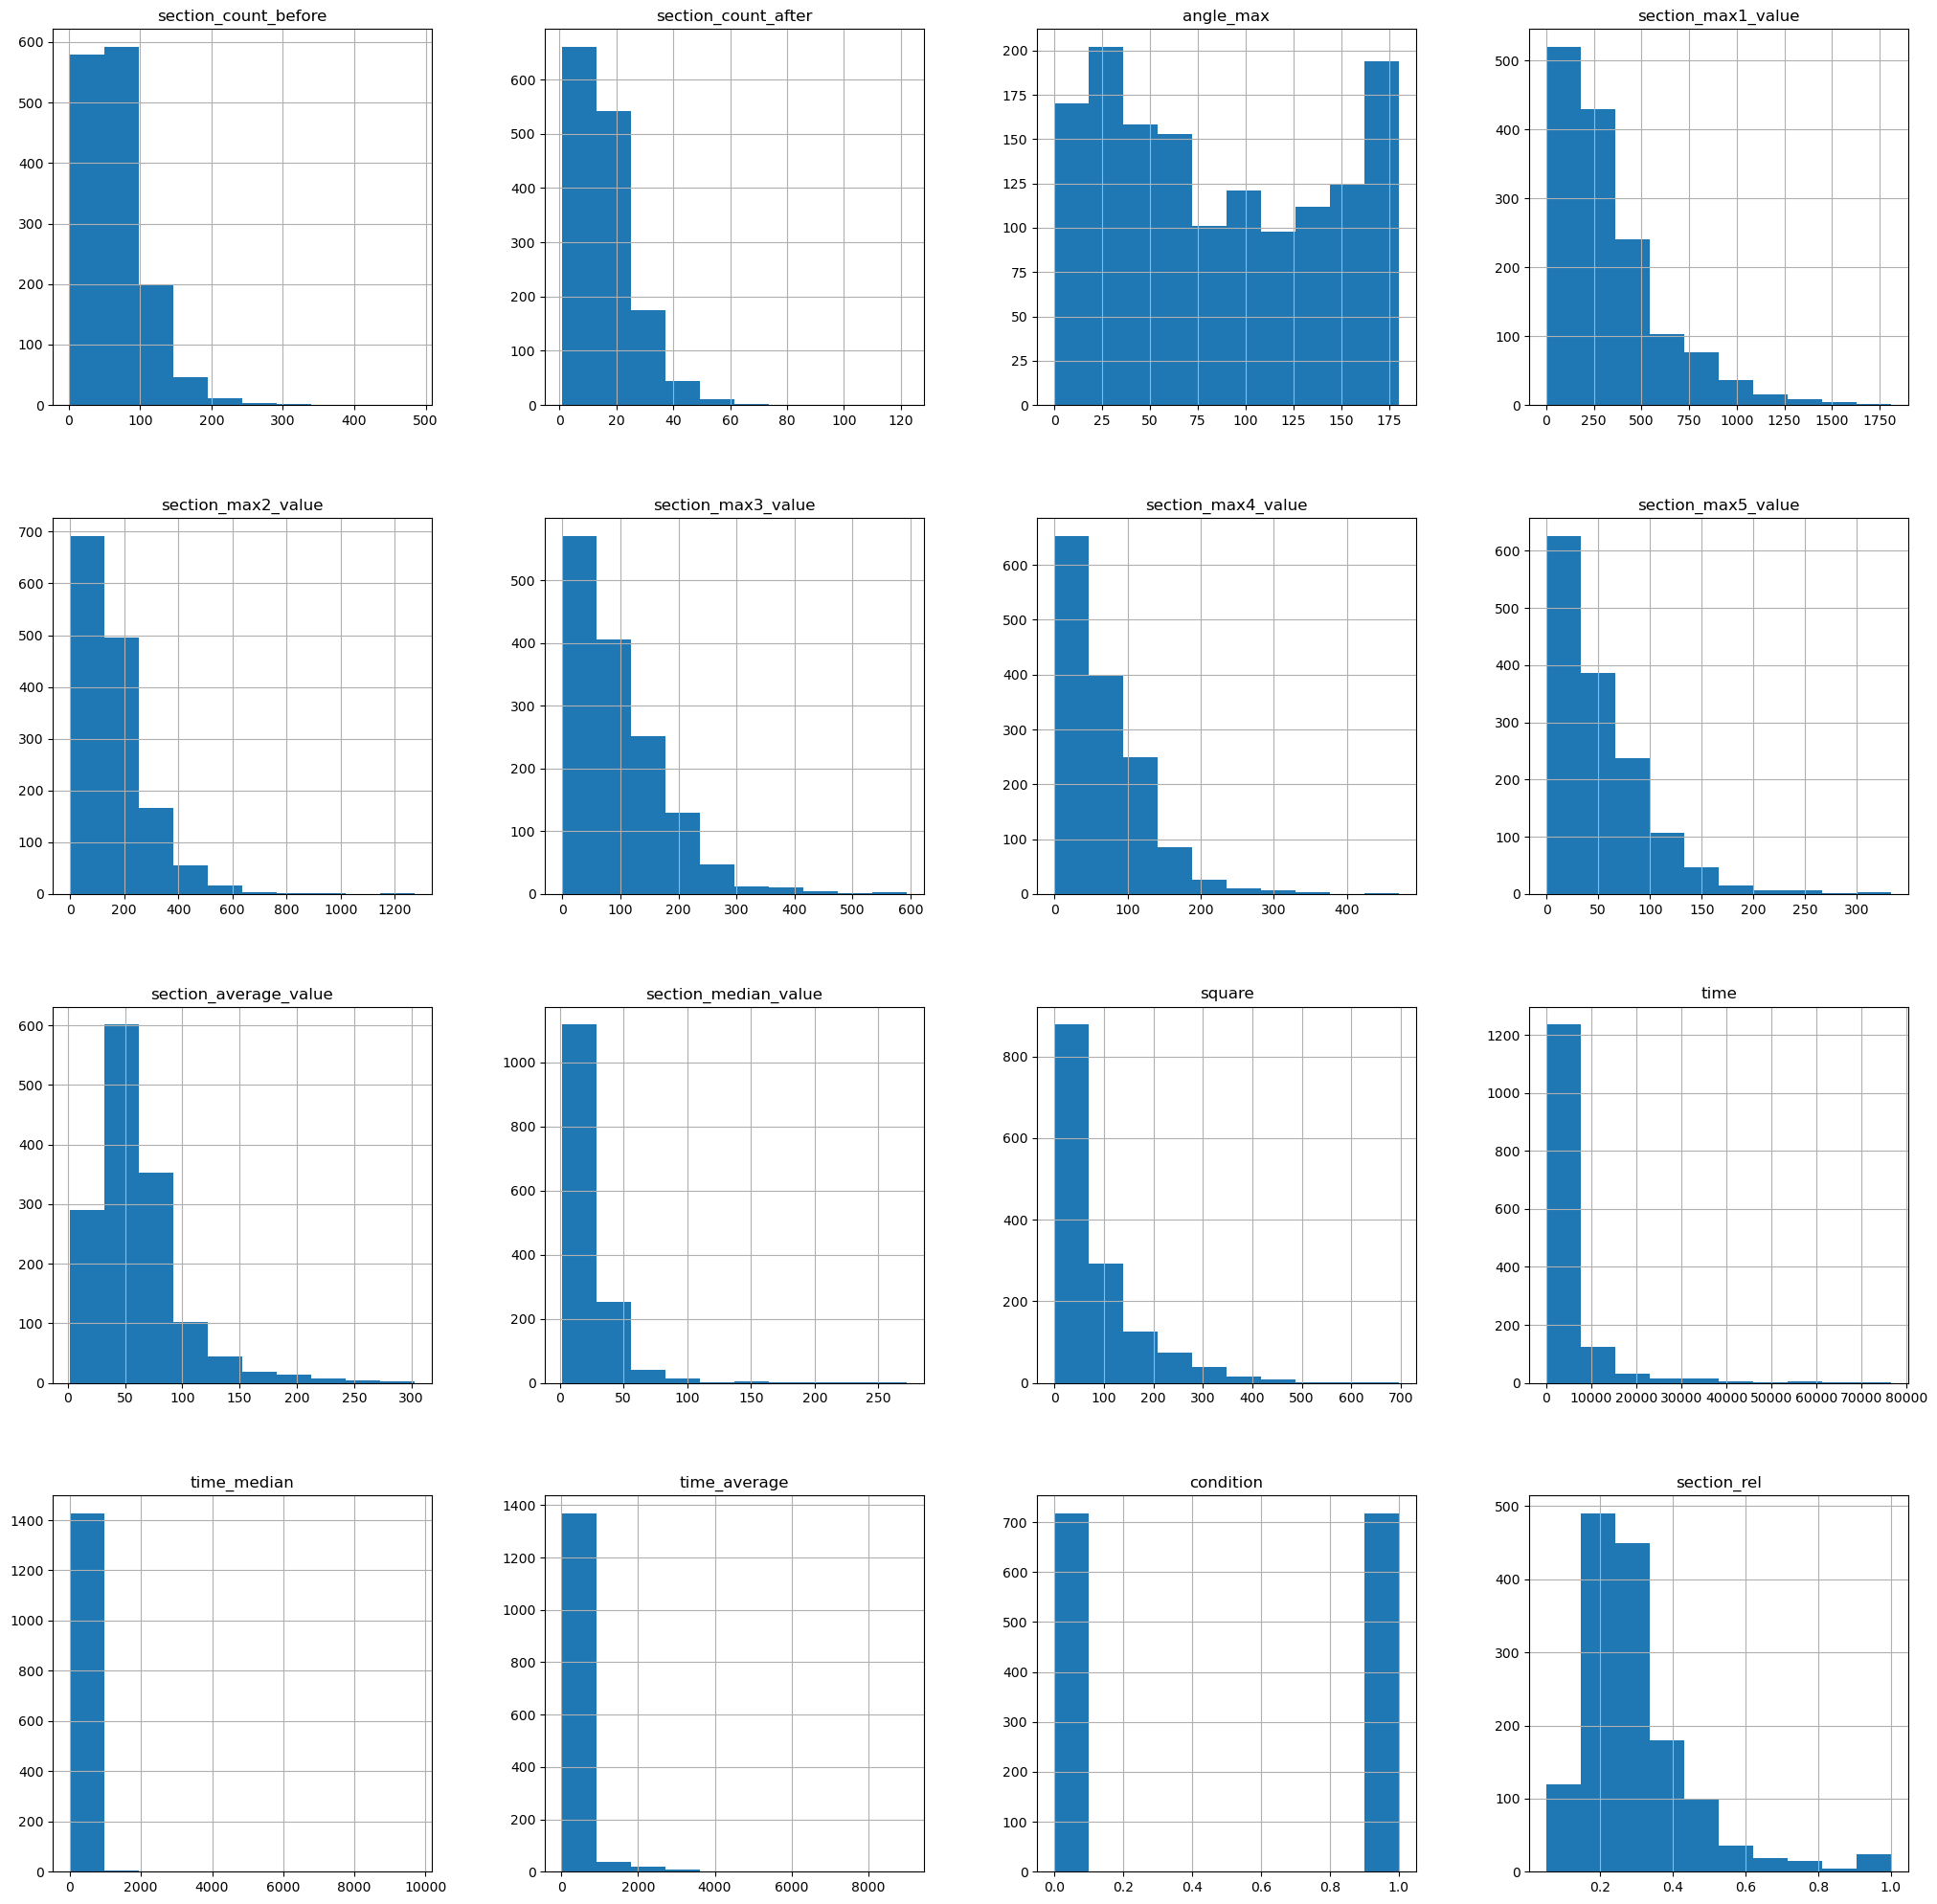

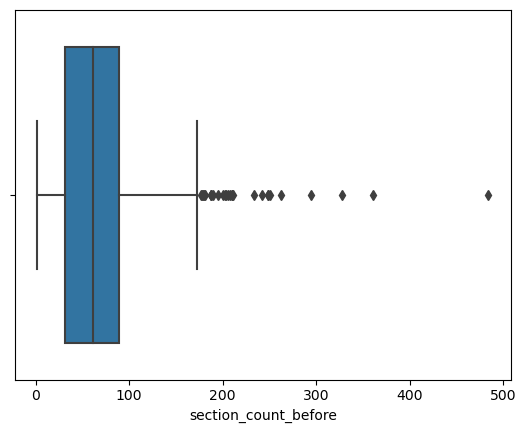

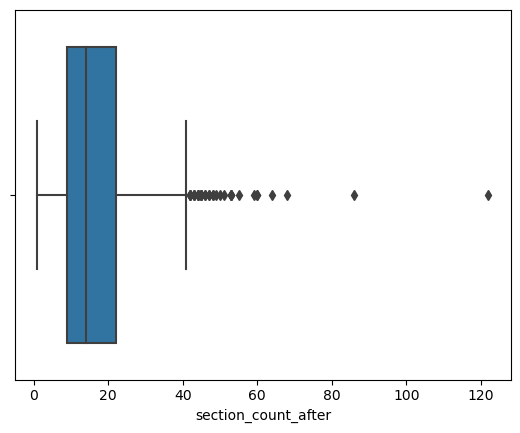

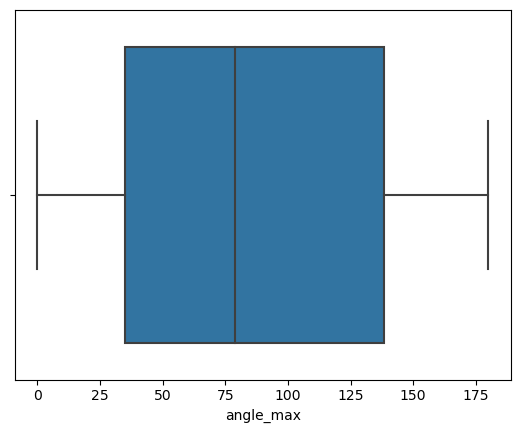

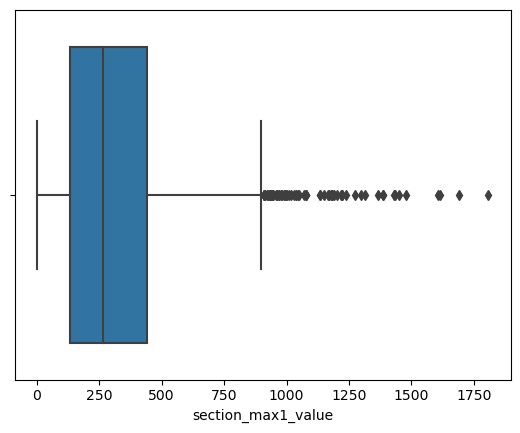

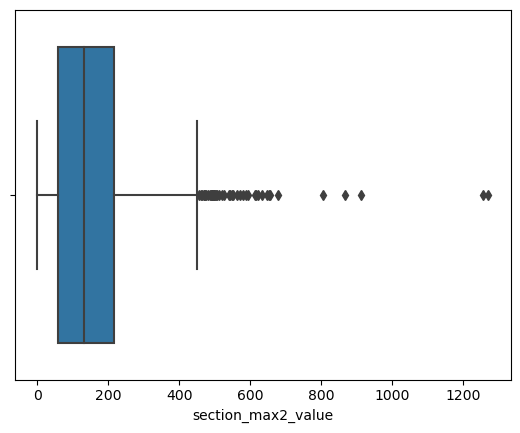

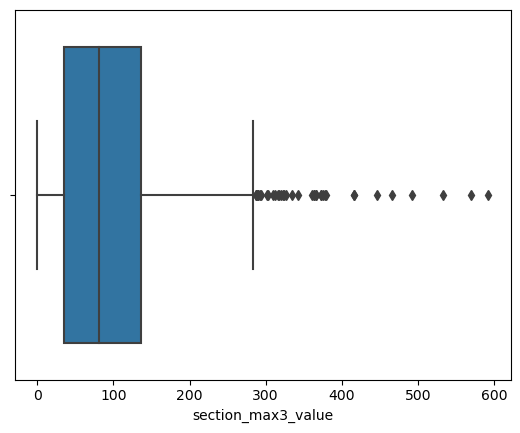

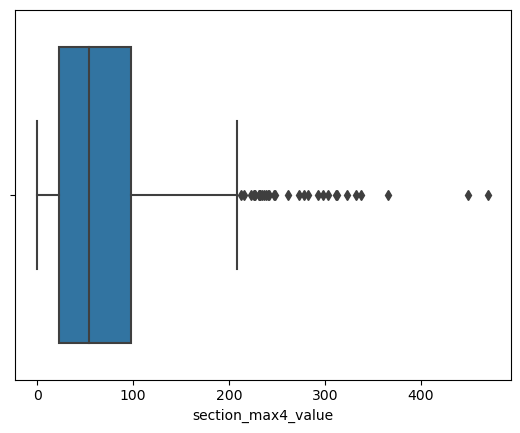

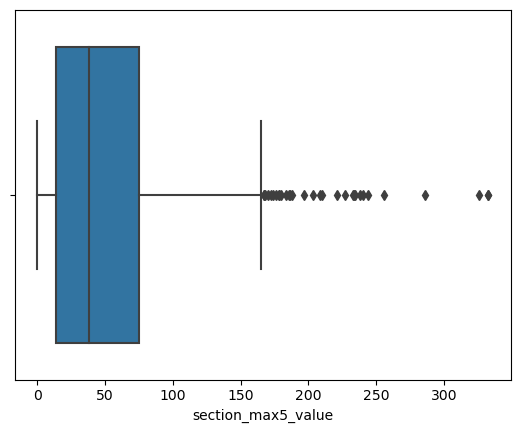

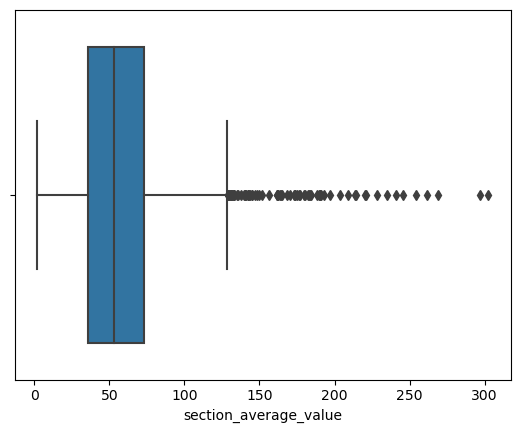

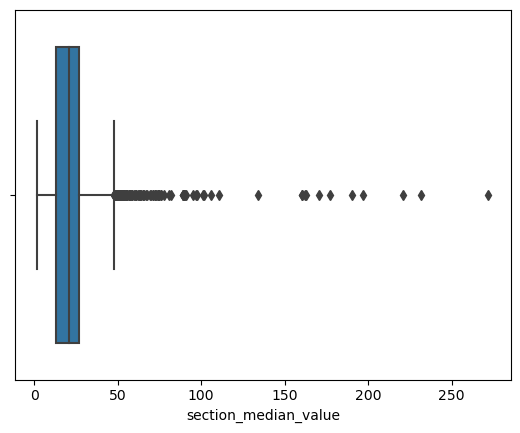

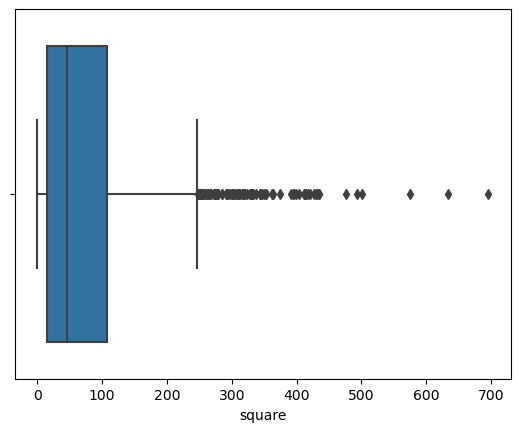

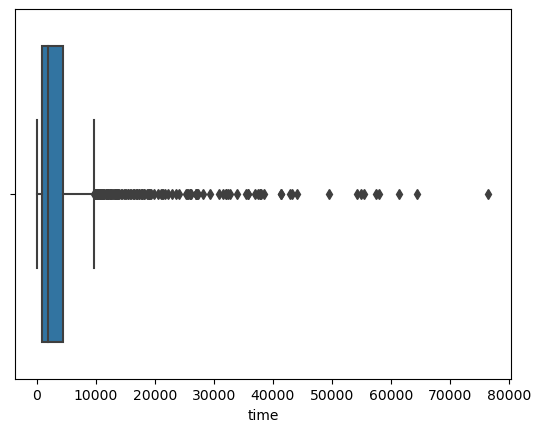

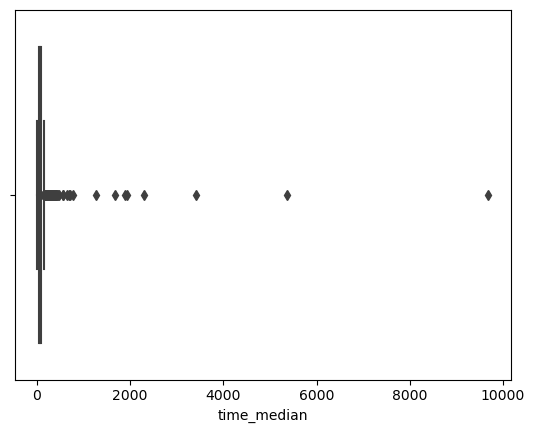

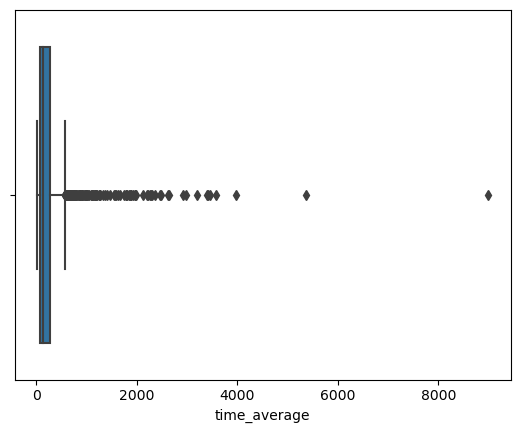

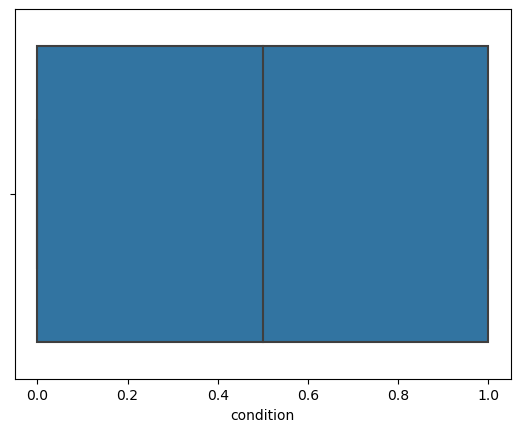

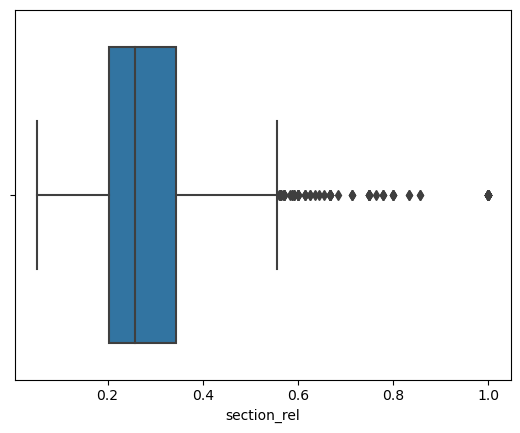

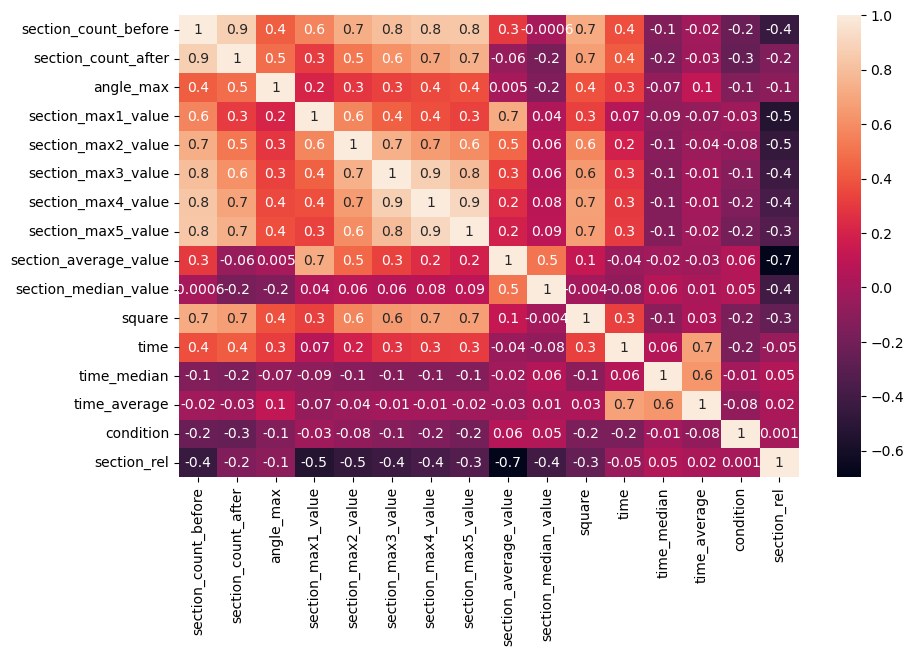

In [122]:
print_hist_boxplot_heatmap(all_data)

In [123]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(854, 16)

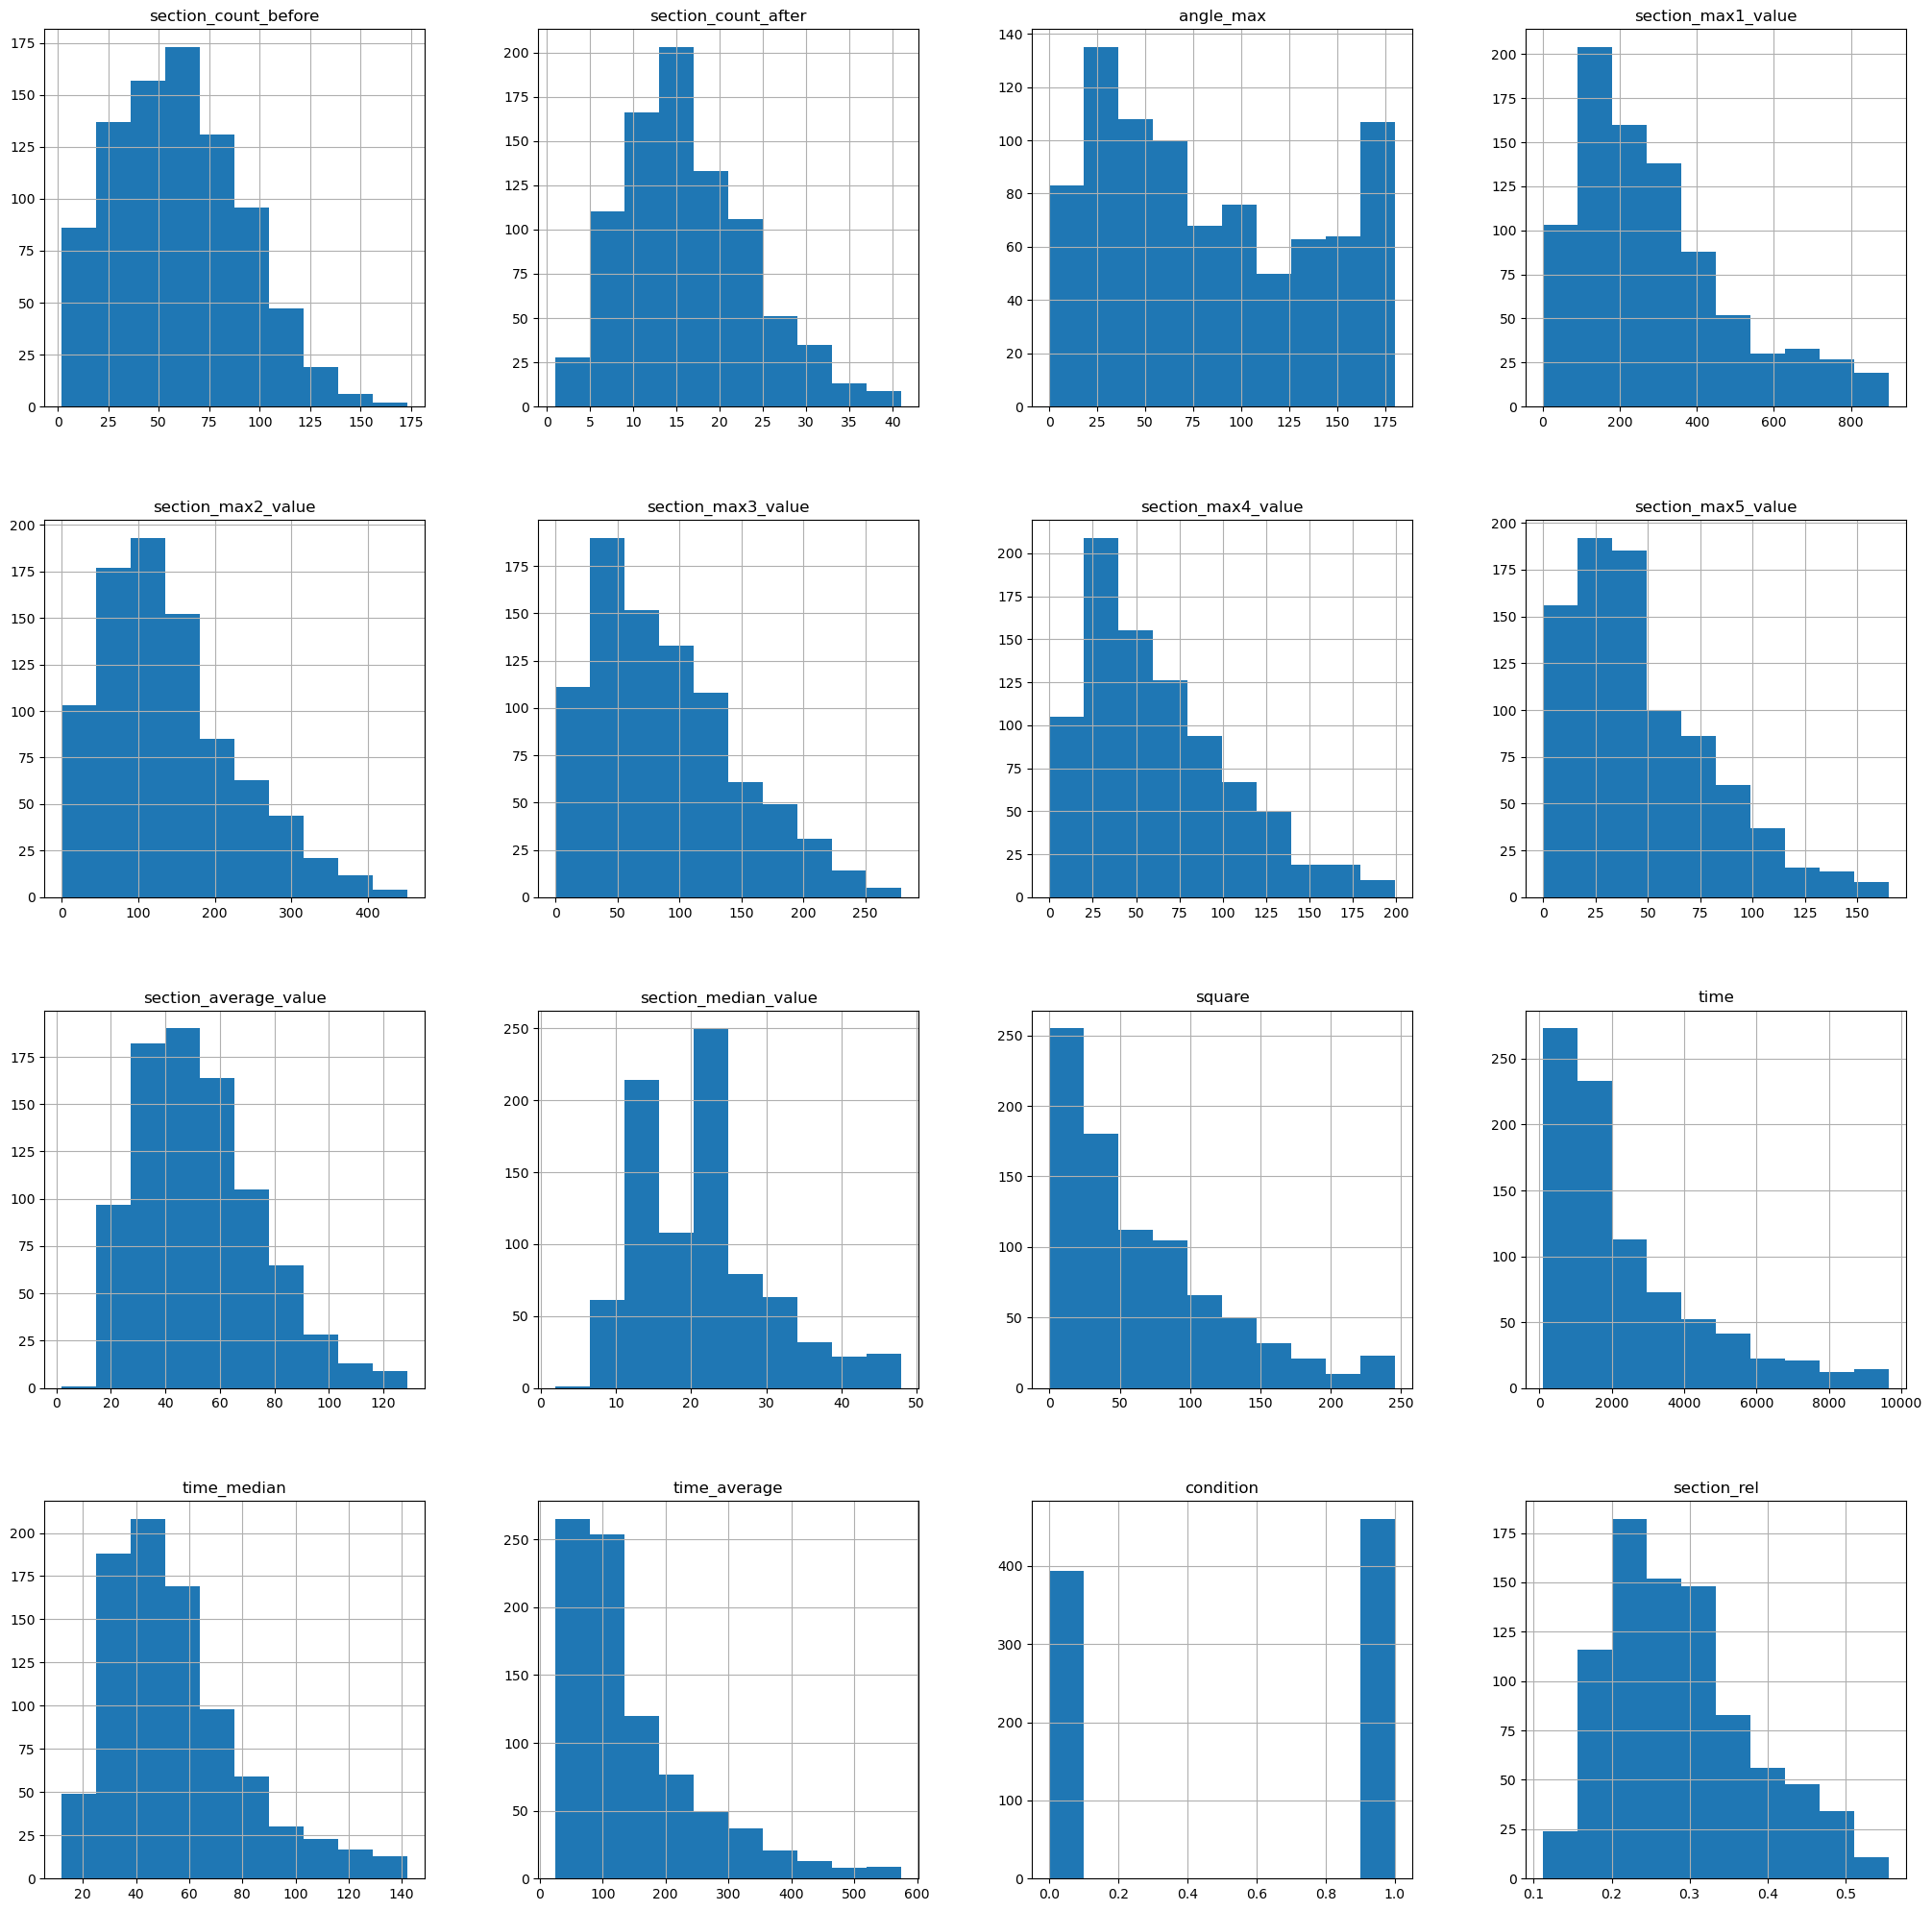

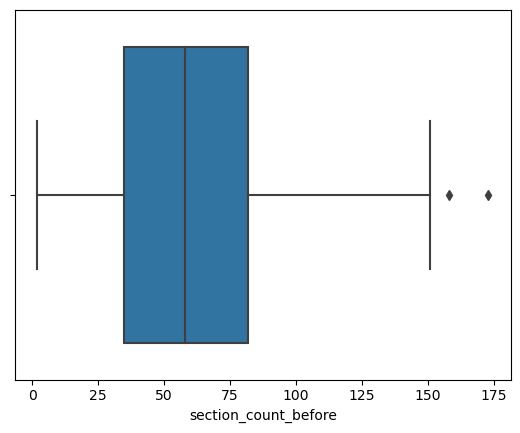

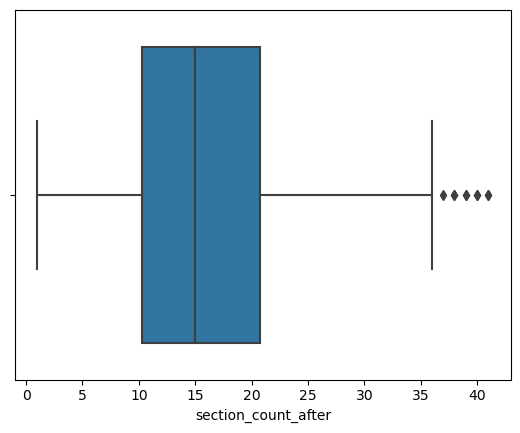

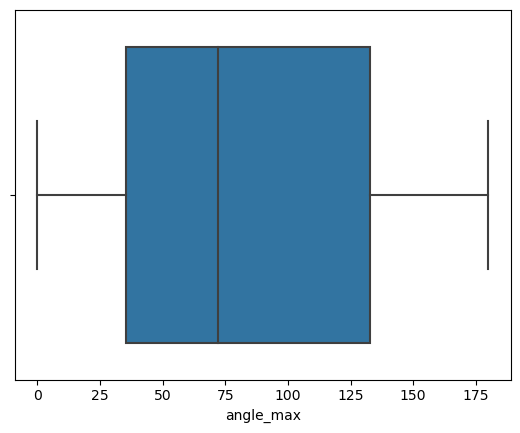

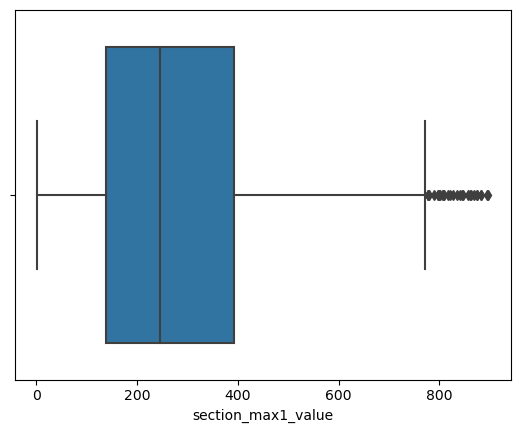

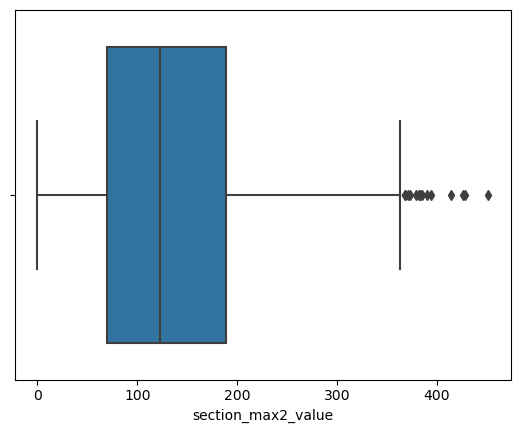

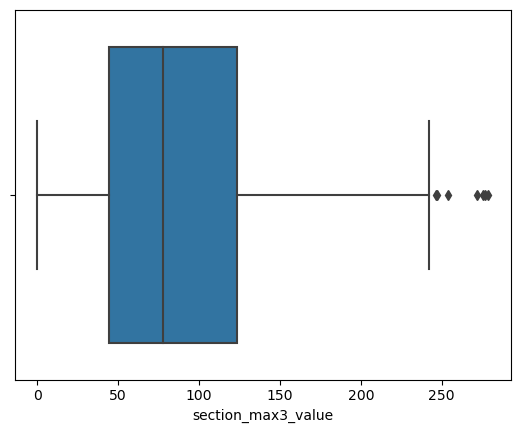

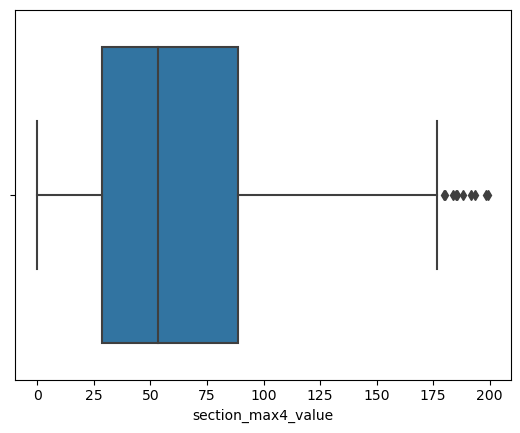

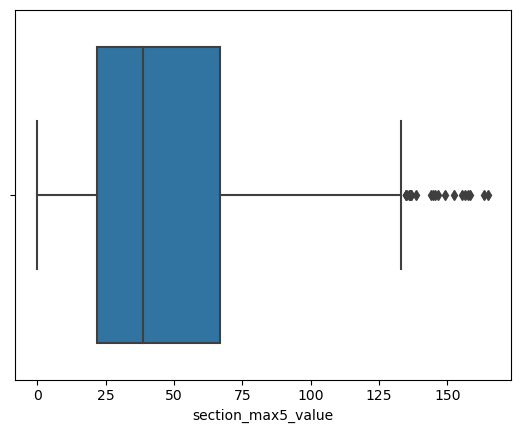

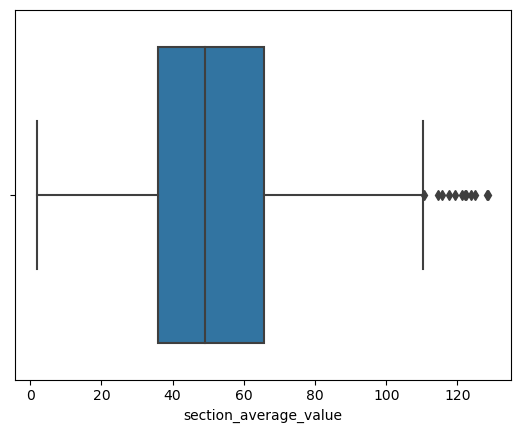

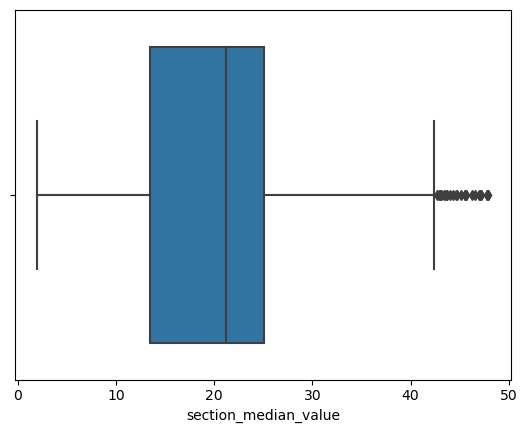

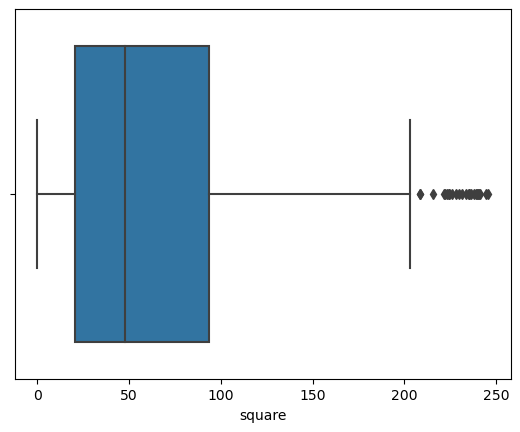

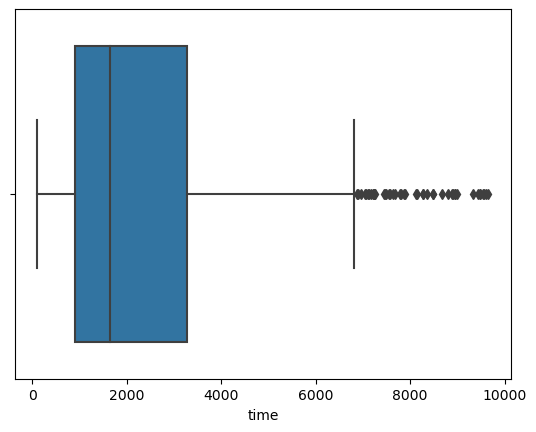

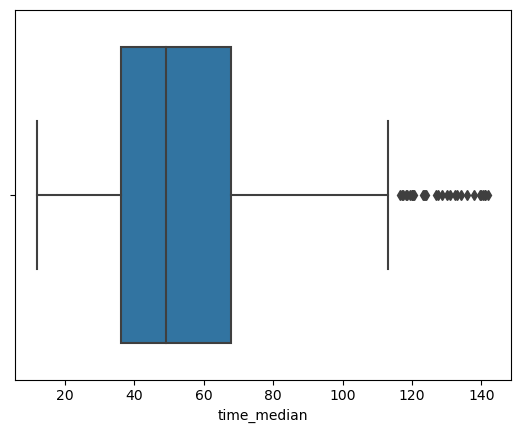

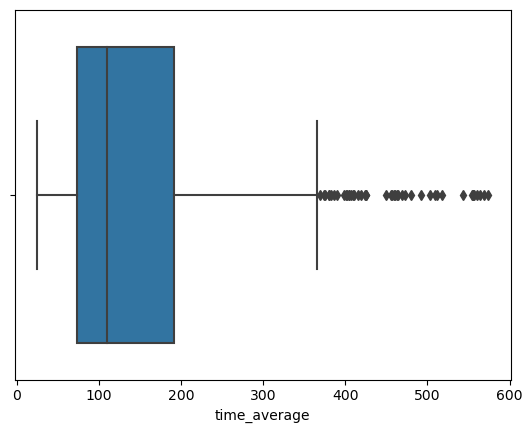

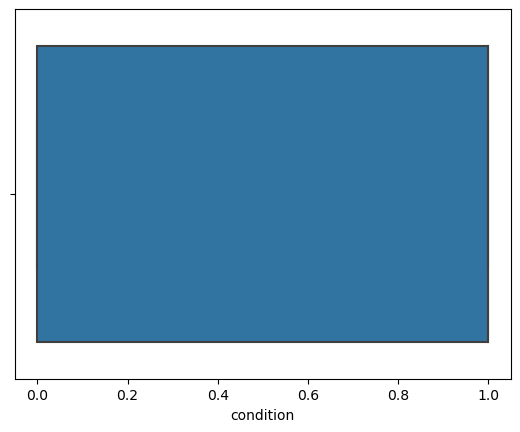

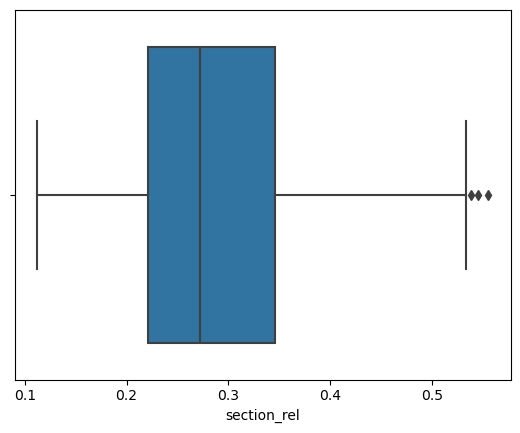

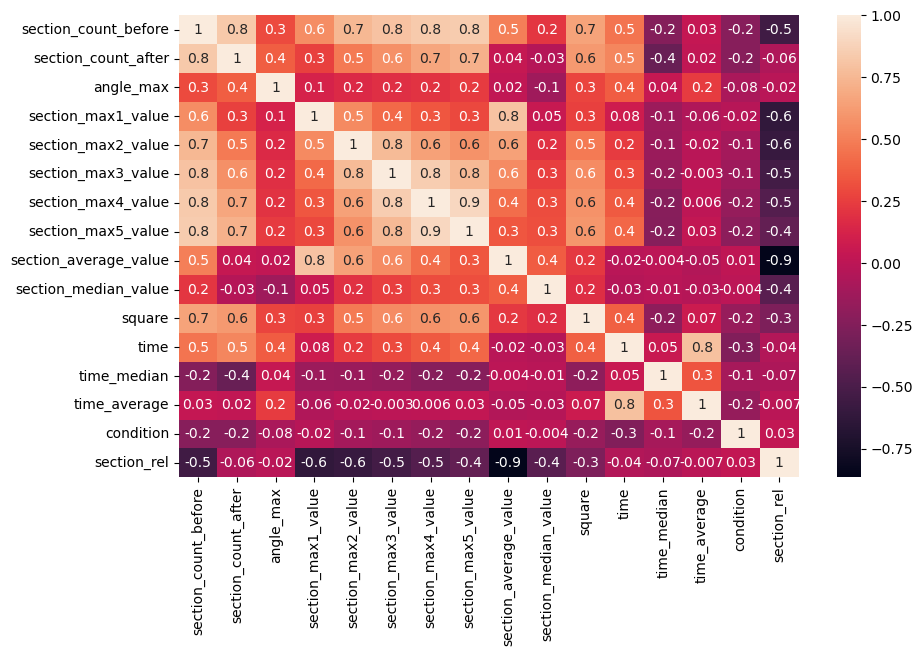

In [124]:
print_hist_boxplot_heatmap(all_data)

In [125]:
from sklearn.preprocessing import MinMaxScaler
scale_data = all_data.drop(["condition", 'section_rel'], axis=1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(scale_data.values)
scale_data = pd.DataFrame(scaled_features, index=scale_data.index, columns=scale_data.columns)

all_data = pd.concat([scale_data,all_data[["condition", 'section_rel']]], axis=1)

In [126]:
# from joblib import dump, load
# dump(scaler, 'std_scaler.bin', compress=True)

In [127]:
#all_data = all_data.drop(['time', 'time_average', 'section_average_value', 'section_max_value'], axis=1)

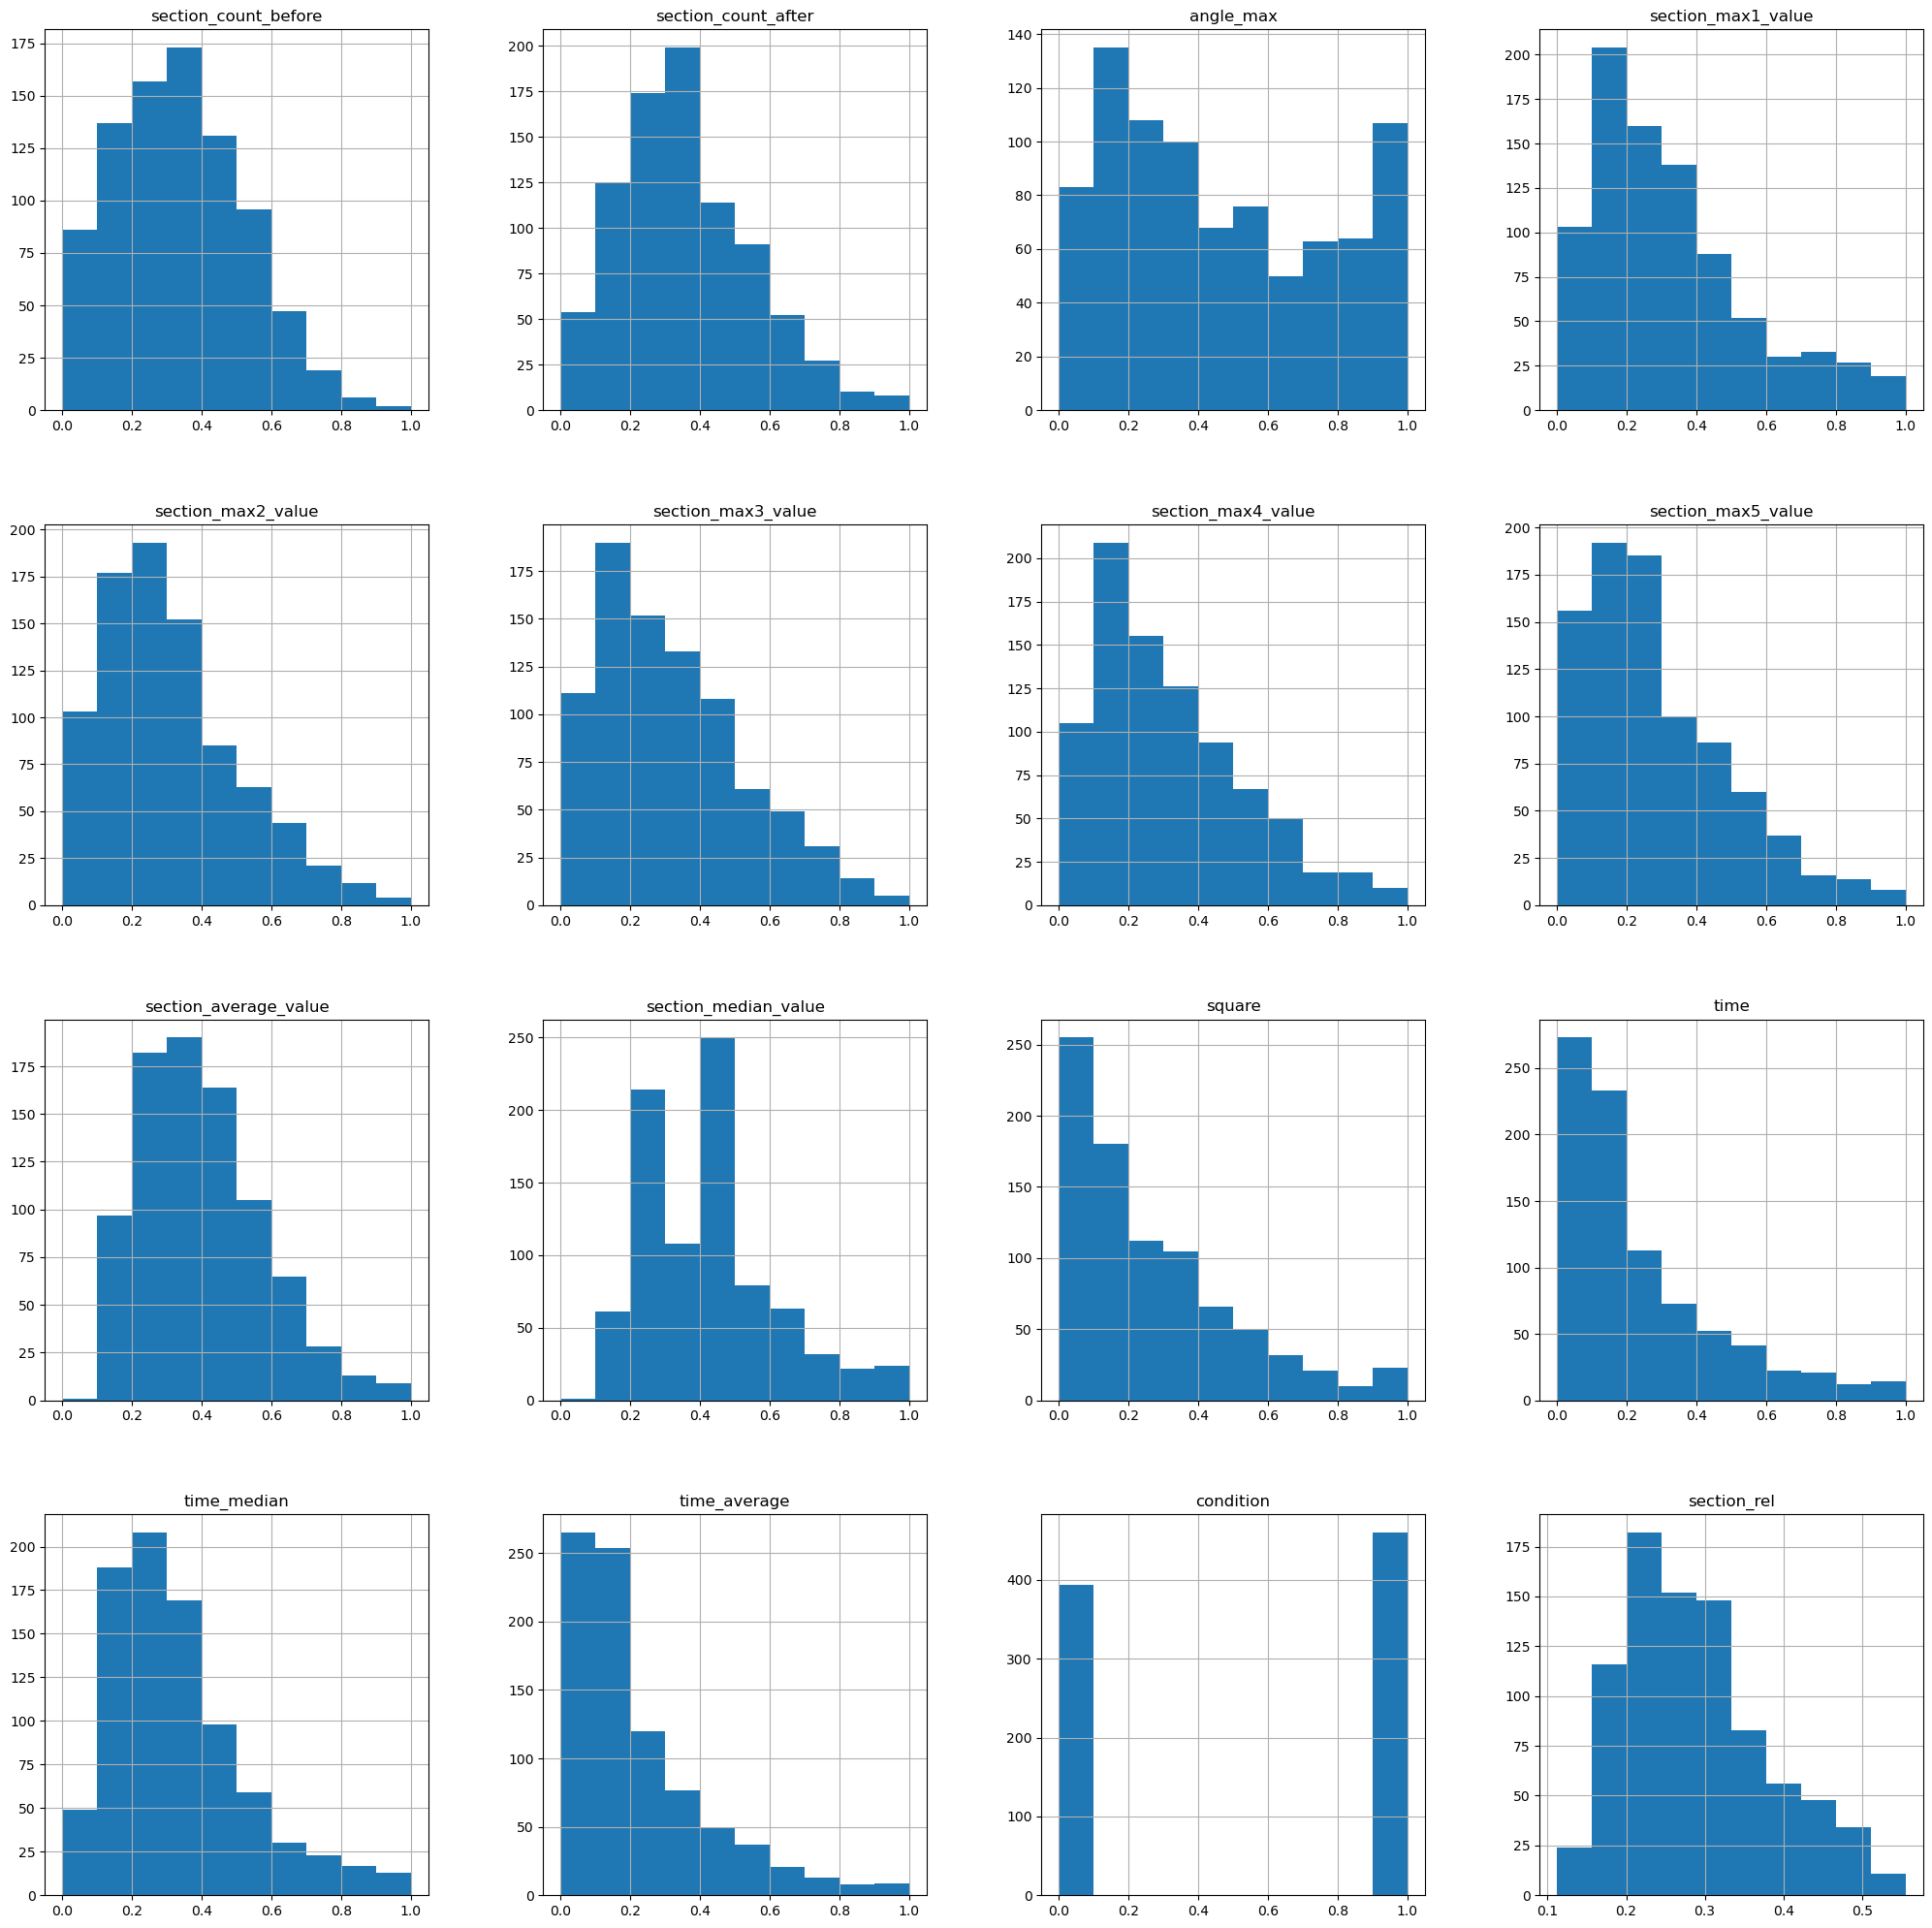

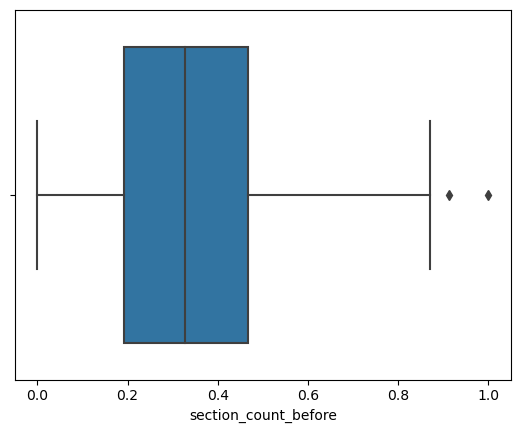

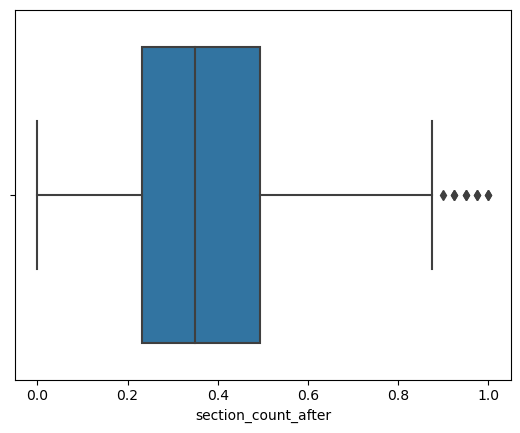

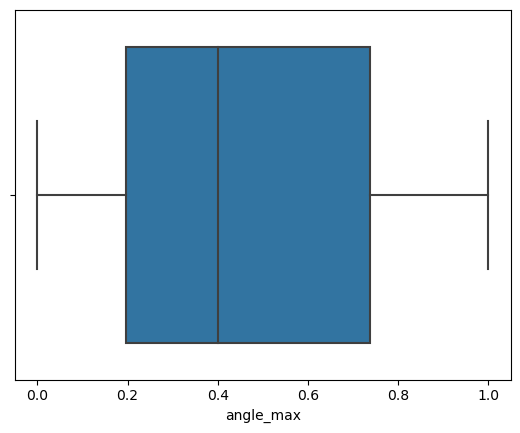

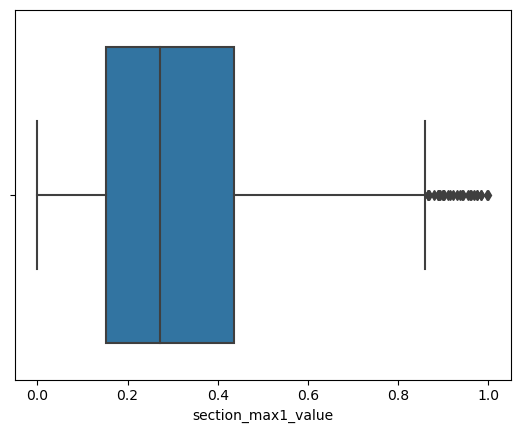

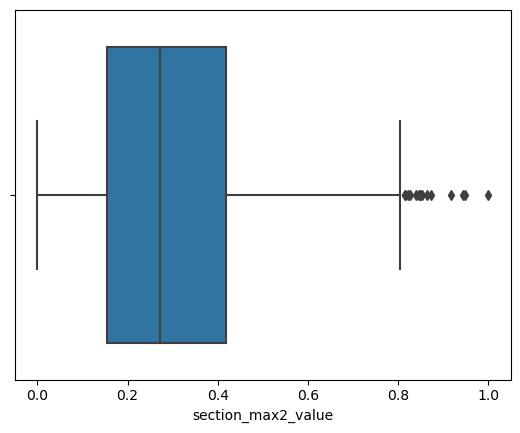

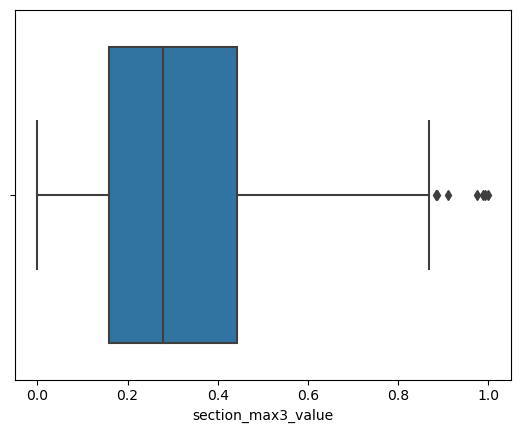

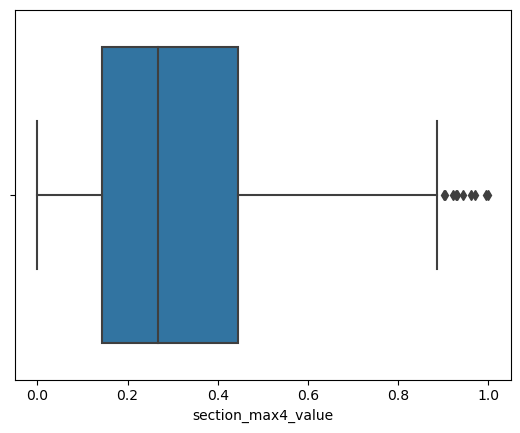

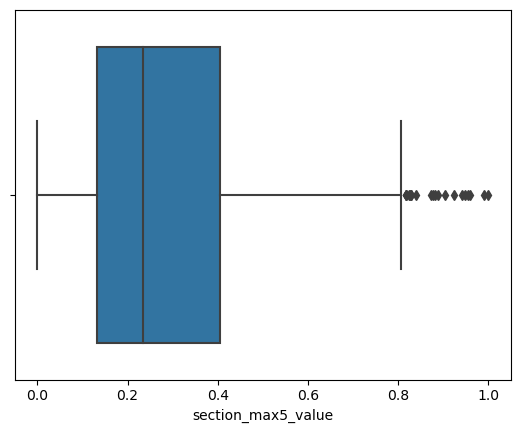

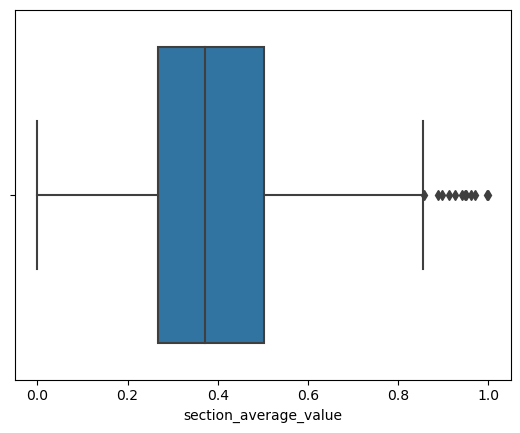

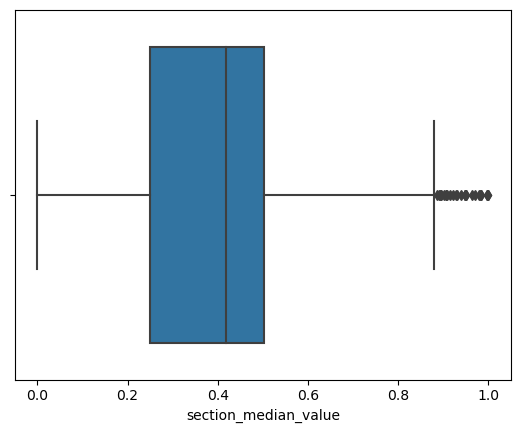

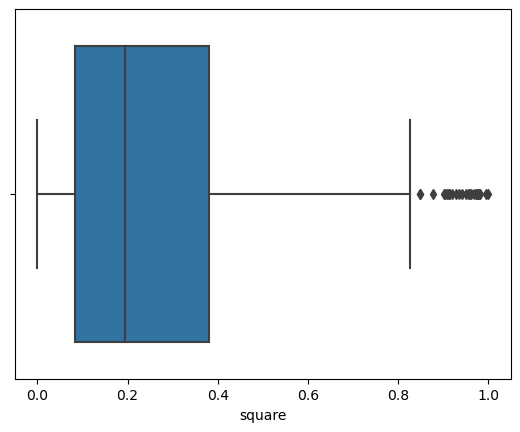

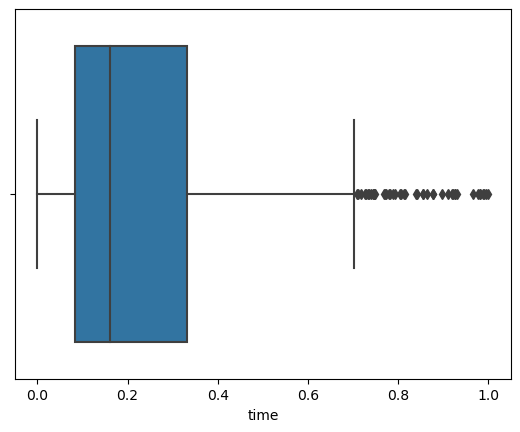

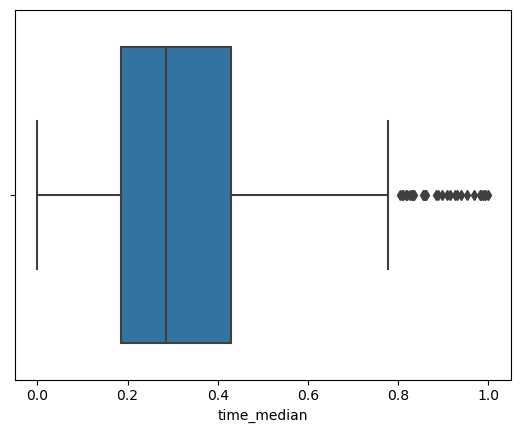

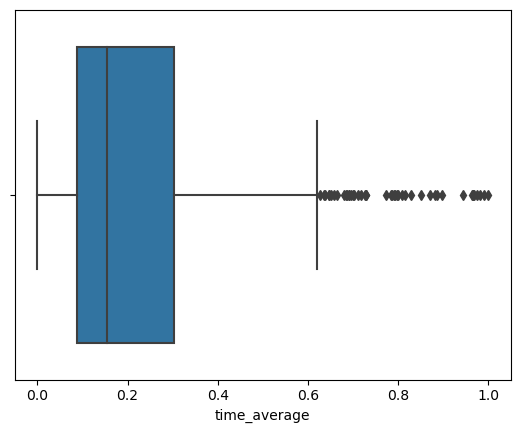

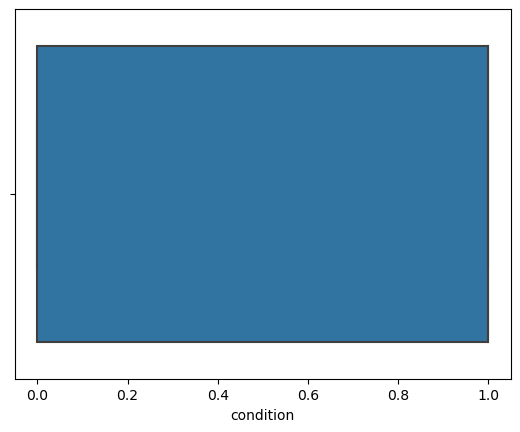

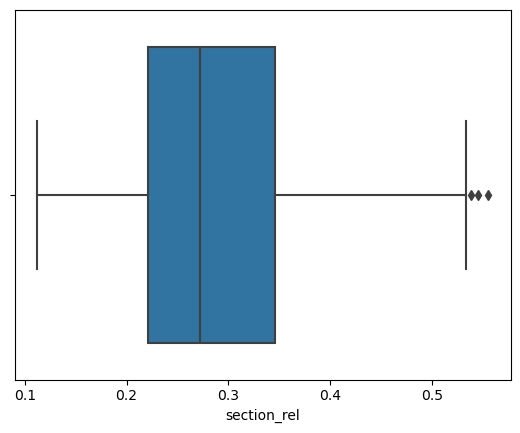

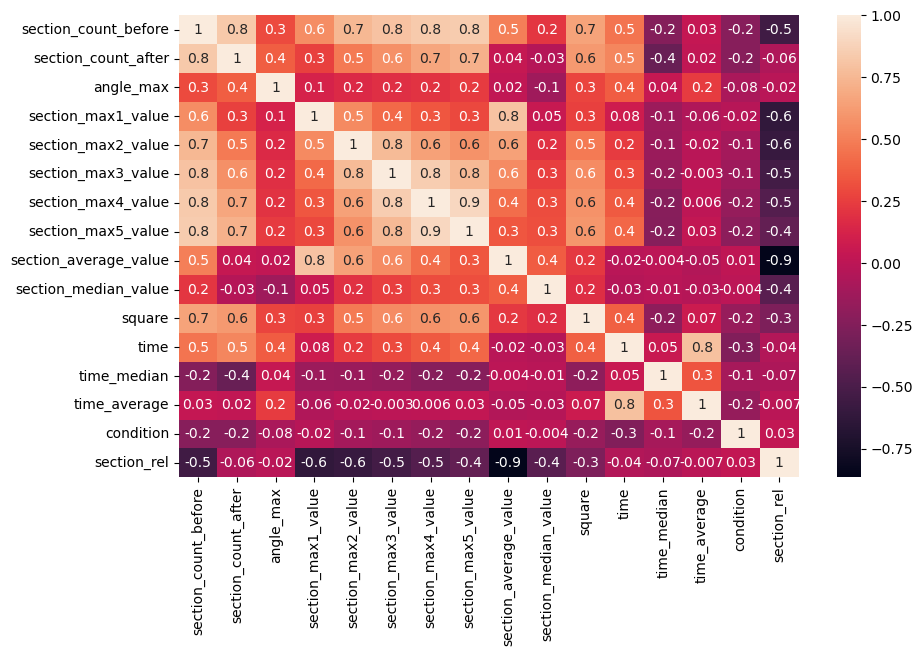

In [128]:
print_hist_boxplot_heatmap(all_data)

In [129]:
import plotly.express as px
from sklearn.decomposition import PCA

X = all_data.drop(["condition"], axis = 1)

pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

fig = px.scatter(components, x=0, y=1, color=all_data['condition'])
fig.show()

[0.41516461 0.17083328]


Обучение

In [141]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [142]:
X = all_data.drop(['condition'], axis = 1)
y = all_data.condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

In [143]:
X_train

,section_count_before,section_count_after,angle_max,section_max1_value,section_max2_value,section_max3_value,section_max4_value,section_max5_value,section_average_value,section_median_value,square,time,time_median,time_average,section_rel
2067,0.672515,0.675,0.854444,0.679322,0.525743,0.629485,0.714355,0.807270,0.502589,0.446860,0.519432,0.166361,0.077816,0.064042,0.239316
564,0.157895,0.225,0.281336,0.180245,0.144013,0.121995,0.105456,0.079008,0.257114,0.230040,0.138469,0.064162,0.382253,0.084484,0.344828
155,0.140351,0.225,0.282533,0.099828,0.166548,0.176069,0.110124,0.069090,0.217562,0.198422,0.033629,0.099087,0.503457,0.145260,0.384615
1150,0.192982,0.250,0.312833,0.159696,0.226007,0.167034,0.227110,0.140551,0.282214,0.211394,0.291288,0.094061,0.277252,0.119912,0.314286
1833,0.573099,0.525,0.181418,0.551881,0.753681,0.673400,0.596737,0.551158,0.580801,0.539713,0.711352,0.231654,0.182404,0.145732,0.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,0.233918,0.425,0.228811,0.256484,0.350590,0.252284,0.231064,0.260633,0.305462,0.275738,0.267576,0.078170,0.119770,0.039981,0.428571
1530,0.076023,0.100,0.077596,0.081545,0.128890,0.066132,0.061228,0.048854,0.255646,0.358087,0.008513,0.019944,0.253482,0.061193,0.333333
431,0.228070,0.225,0.872116,0.231924,0.264887,0.246011,0.185660,0.122548,0.377579,0.300878,0.128740,0.081884,0.229848,0.115323,0.243902
685,0.456140,0.450,0.724247,0.442394,0.206454,0.309628,0.401532,0.402907,0.415116,0.466353,0.513887,0.388616,0.468875,0.319782,0.237500


In [144]:
y_train

2067    0
564     1
155     0
1150    1
1833    0
       ..
1368    1
1530    1
431     1
685     1
644     1
Name: condition, Length: 683, dtype: int64

Градиентый бустинг

In [145]:
from xgboost import XGBClassifier

In [146]:
grid_param = {'learning_rate': [0.001, 0.01, 0.1], 
        'min_child_weight': [1, 5, 10],
        'max_depth': [5, 10, 15],
        'n_estimators': [10, 50, 100, 500, 1000]
        }

In [147]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [5, 10, 15],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [148]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': 10,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 10,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [149]:
y_pred = best_clf.predict(X_test)

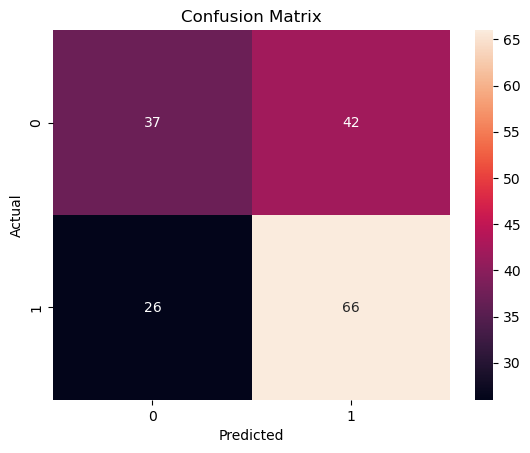

In [150]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [152]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.59      0.47      0.52        79
     class 1       0.61      0.72      0.66        92

    accuracy                           0.60       171
   macro avg       0.60      0.59      0.59       171
weighted avg       0.60      0.60      0.60       171



In [364]:
best_clf.save_model('xgb_model.json')

In [365]:
type(best_clf)

xgboost.sklearn.XGBClassifier

In [366]:
X_test

,section_count_before,section_count_after,angle_max,section_max_value,section_average_value,section_median_value,square,time,time_median,time_average,section_rel
2347,117,28,153.799885,610.358911,65.663809,22.514514,127.672834,1692.8424,22.19620,60.458657,0.239316
1980,38,16,21.801409,74.000000,28.298032,17.530560,32.475584,664.9748,35.81785,41.560925,0.421053
461,61,16,133.051915,141.834410,50.129961,31.262434,60.011475,3050.3306,39.62645,190.645662,0.262295
281,57,15,102.578935,381.903129,48.025899,12.369317,71.088473,1615.5248,56.55390,107.701653,0.263158
428,48,8,19.759471,242.330353,78.534989,38.949750,6.501587,659.5197,72.27355,82.439963,0.166667
...,...,...,...,...,...,...,...,...,...,...,...
1932,60,17,32.969404,142.618372,43.206912,20.880613,31.567653,702.7768,24.00100,41.339812,0.283333
2350,22,7,33.968990,59.816386,32.993878,31.764760,9.186441,851.0626,60.00060,121.580371,0.318182
1553,83,19,30.072226,537.410458,64.652316,19.723083,86.998131,1548.7100,36.00320,81.511053,0.228916
2415,78,16,99.552680,389.344321,63.976156,23.390776,86.384553,3035.2802,26.44070,189.705013,0.205128


In [367]:
X_test.condition

AttributeError: 'DataFrame' object has no attribute 'condition'

Случайный лес

In [38]:
grid_param = {
    'n_estimators': [50, 100, 150, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 2)
}

In [39]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 5, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 2),
                         'n_estimators': [50, 100, 150, 200, 400]})

In [40]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
y_pred = best_clf.predict(X_test)

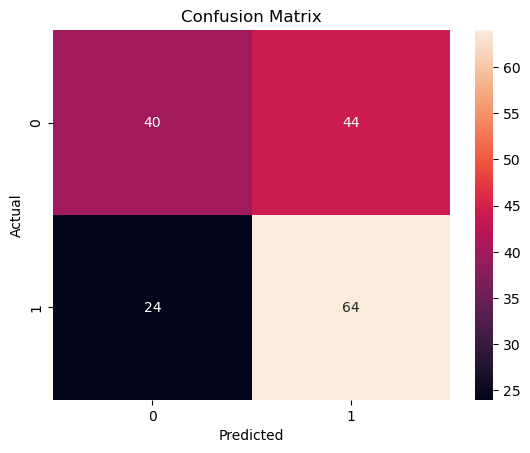

In [43]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [44]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.62      0.48      0.54        84
     class 1       0.59      0.73      0.65        88

    accuracy                           0.60       172
   macro avg       0.61      0.60      0.60       172
weighted avg       0.61      0.60      0.60       172



In [ ]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- section_average_value
- section_count_after
- section_count_before
- section_max_value
- section_median_value
- ...


Text(0.5, 0, 'Random Forest Feature Importance')

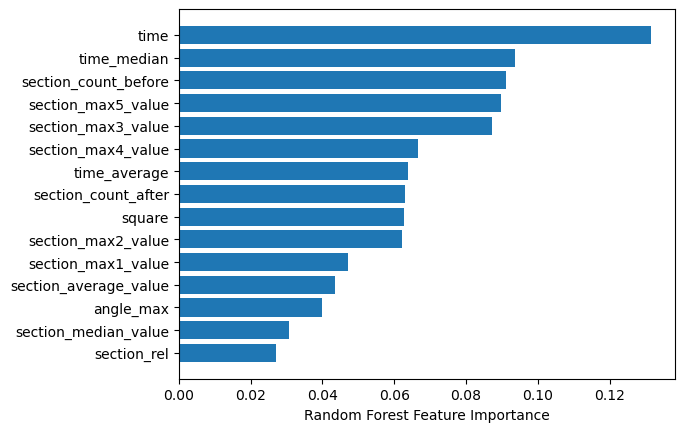

In [45]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
np.sum(best_clf.feature_importances_)

1.0

KNN

In [ ]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [ ]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
y_pred = best_clf.predict(X_test)

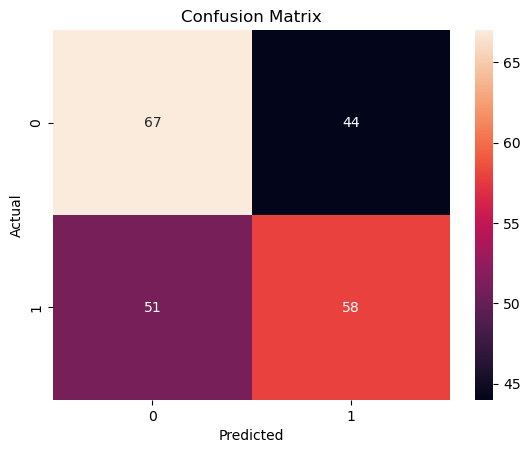

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.57      0.60      0.59       111
     class 1       0.57      0.53      0.55       109

    accuracy                           0.57       220
   macro avg       0.57      0.57      0.57       220
weighted avg       0.57      0.57      0.57       220



SVM

In [ ]:
from sklearn.svm import SVC
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['rbf', 'sigmoid']}

In [ ]:
svc_clas = SVC()
grid_svm = GridSearchCV(svc_clas, param_grid, refit = True, cv = 3, n_jobs = -1)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'sigmoid']})

In [ ]:
best_clf = grid_svm.best_estimator_
best_clf.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
y_pred = best_clf.predict(X_test)

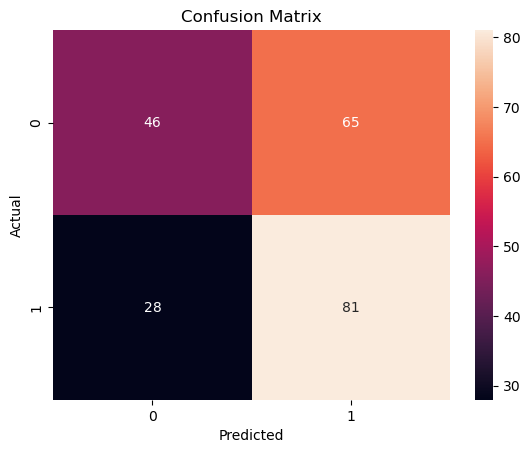

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.62      0.41      0.50       111
     class 1       0.55      0.74      0.64       109

    accuracy                           0.58       220
   macro avg       0.59      0.58      0.57       220
weighted avg       0.59      0.58      0.57       220

